In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

<a id = "badge4_code"></a>

<div class="alert alert-block alert-success">
    
<b> Coding Question: Use the Sampler Primitive with a Qiskit Runtime Session to run the circuit _qc_ twice on a noisy simulator with 4000 shots, once with no error mitigation and once with M3 error mitigation, and obtain the quasi-distribution output for each result.
    
</div>

<details><summary><b>Click to expand for hints.</b></summary>
<p>
    

- **[Documentation - Help on noisy simulators](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/how_to/noisy_simulators.html#running-a-noisy-simulation)**
- **[Documentation - Sampler](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials/how-to-getting-started-with-sampler.html)**
- **[Documentation - Options](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.options.Options.html#options)**
- **[Documentation - Configuring error mitigation](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/how_to/error-mitigation.html)**
- **[Documentation - Running primitives in a session](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/how_to/run_session.html)**
- When setting up your sampler instances for each run, use 'sim' to define the simulator options and make sure to use the relevant options you defined.
- Your quasi-distributions must be `dict` type, not a list or any other type. 
    
</p>
</details>

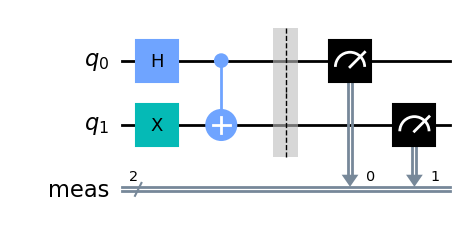

In [9]:
# Do not edit this code. Use this circuit in your answers.
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
#qc.h(0)
qc.measure_all()
qc.draw()

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel
import numpy as np
# Save the Runtime account credentials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True)

service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend('ibmq_qasm_simulator')
print(backend)

# Obtaining the noise model we will apply to the backend we obtained above
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

# Use this when defining the simulator in your options instances
sim = {
    "noise_model": noise_model,
    "seed_simulator": 42, # Do not change this value. Doing so may result in your answer being marked as incorrect.
}

####### build your code below #########

#phases = np.linspace(0, 2*np.pi, 2)

#individual_phases = [[ph] for ph in phases]

options = Options(sim,resilience_level=0) # options with no error mitigation

options_with_m3 = Options(sim,resilience_level=1) # options with M3 error mitigation

options.execution.shots = 4000
options.optimization_level = 1

options_with_m3.execution.shots = 4000
options_with_m3.optimization_level = 1

with Session(service=service, backend=backend):
    # no error mitigation
    sampler = Sampler(options=options)
    job = sampler.run(circuits=qc)
    results_no_em = job.result()
    quasi_dist_no_em = results_no_em.quasi_dists[0]
    
    # apply M3 error mitigation
    sampler = Sampler(options=options_with_m3)
    job = sampler.run(circuits=qc)
    results_with_m3 = job.result()
    quasi_dist_with_m3 =  results_with_m3.quasi_dists[0]
    

####### build your code above #########

print("Running your session, please be patient...")
print(f"Quasi-distribution with no error mitigation: {quasi_dist_no_em}")
print(f"Quasi-distribution with error mitigation: {quasi_dist_with_m3}")

<IBMBackend('ibmq_qasm_simulator')>
Running your session, please be patient...
Quasi-distribution with no error mitigation: {1: 0.489, 2: 0.511}
Quasi-distribution with error mitigation: {1: 0.494, 2: 0.506}


In [11]:
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
# Import FakeBackend
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend('ibmq_qasm_simulator')
print(backend)

# Set options to include noise_model
options = Options(simulator={
    "noise_model": noise_model,
    "seed_simulator": 42,
}, resilience_level=0)

# Set options to include noise_model and resilience_level
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level=1
)

<IBMBackend('ibmq_qasm_simulator')>


In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    #job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    job = sampler.run(circuits=qc)
    results_no_em = job.result()
    quasi_dist_no_em = results_no_em.quasi_dists[0]
    print(f"Quasi-distribution with no error mitigation: {quasi_dist_no_em}")
    #prob_values = [1-dist[0] for dist in param_results.quasi_dists]
    
    

Quasi-distribution with no error mitigation: {1: 0.369, 0: 0.13975, 2: 0.45875, 3: 0.0325}


In [14]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=qc)
    results_with_m3 = job.result()
    quasi_dist_with_m3 = results_with_m3.quasi_dists[0]
    print(f"Quasi-distribution with error mitigation: {quasi_dist_with_m3}")

Quasi-distribution with error mitigation: {0: 0.011835180722095105, 1: 0.48784140401270437, 2: 0.4983486948083151, 3: 0.001974720456885419}


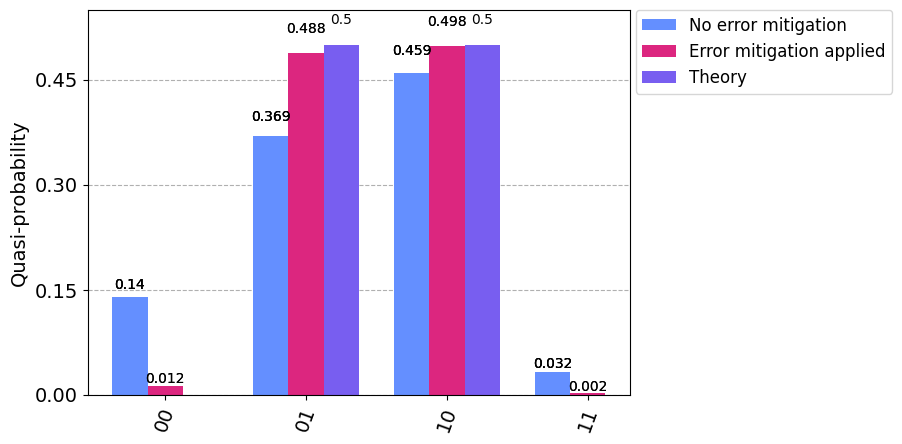

In [15]:
# Visualize your results

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# Convert integers to binary strings 
binary_prob_dist_no_em = quasi_dist_no_em.binary_probabilities()
binary_prob_dist_with_m3 = quasi_dist_with_m3.binary_probabilities()

# Theoretical results
qc.remove_final_measurements()
theory_probabilities = Statevector(qc).probabilities_dict()
qc.measure_all()

# Plot all the results
legends = ["No error mitigation", "Error mitigation applied", "Theory"]
plot_histogram([binary_prob_dist_no_em, binary_prob_dist_with_m3, theory_probabilities], legend=legends)

You should obtain a graph that looks like so. The theory legend key has been added into this screenshot for you.

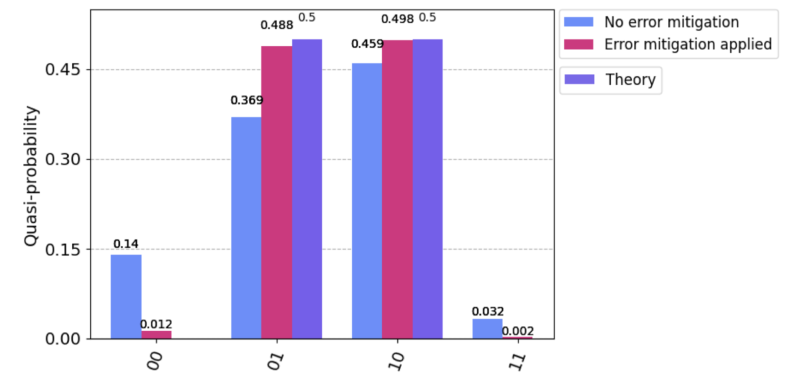

In [16]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge4_code
 
answer_code = grade_badge4_code([results_no_em, results_with_m3], [quasi_dist_no_em, quasi_dist_with_m3]) # Expected result type: List

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


#### [Ungraded] Run your circuit on a real device!

Fill in the missing code with your answers from above cells below to run your quantum circuit on a real device. Fill in the missing code with your answers from above. 

In [17]:
# Get the least-busy backend, this step may take a while
real_backend = service.least_busy(min_num_qubits=2, simulator=False)

print(f"The least busy backend is {real_backend.name}.")

The least busy backend is ibmq_lima.


In [18]:
###### Add your answers from above here before running the cell #######
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
service = QiskitRuntimeService(channel='ibm_quantum')

options = Options(real_backend='ibmq_lima', resilience_level=0)

options_with_m3 = Options(real_backend= 'ibmq_lima', resilience_level=1)

with Session(service=service, backend=real_backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=qc)
    print(f"Job ID: {job.job_id()}") # do not change or delete this line
    results_no_em = job.result()
    quasi_dist_no_em = results_no_em.quasi_dists[0]
    
    sampler = Sampler(options=options_with_m3)
    job = sampler.run(circuits=qc)
    print(f"Job ID: {job.job_id()}") # do not change or delete this line
    results_with_m3 = job.result()
    quasi_dist_with_m3 = results_with_m3.quasi_dists[0]
    

print(f"Quasi-distribution with no error mitigation: {quasi_dist_no_em}")
print(f"Quasi-distribution with error mitigation: {quasi_dist_with_m3}")

Job ID: cju7n27toe8ecfad8fcg
Job ID: cju7n3vtoe8ecfad8fs0
Quasi-distribution with no error mitigation: {0: 0.03675, 1: 0.457, 2: 0.49775, 3: 0.0085}
Quasi-distribution with error mitigation: {0: 0.0018126124088571048, 1: 0.47177409977164403, 2: 0.526224770768713, 3: 0.00018851705078581452}


While your jobs are running, you can monitor them! Simply copy the Job ID printed out for you for one of the runs and enter it into the search bar **[here](https://quantum-computing.ibm.com/jobs)**! Make sure you are logged into the IBM Quantum Platform to access this page. 

In [ ]:
# Visualize your results

binary_prob_dist_no_em = quasi_dist_no_em.binary_probabilities()
binary_prob_dist_with_m3 = quasi_dist_with_m3.binary_probabilities()
legend = ["No error mitigation", "Error mitigation applied", "Theory"]
plot_histogram([binary_prob_dist_no_em, binary_prob_dist_with_m3, theory_probabilities], legend=legend)